In [1]:
import pandas as pd

In [2]:
var_2=pd.read_csv("C:\\Users\\asus\\Downloads\\Fitness Classes Data\\path_to_cleaned_file_KashishSharma.csv")

In [3]:
var_2.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),DayOfWeek,Hour,ActivitySiteID_Num
0,BRP,20:20:20 9.30-10.30am,2018-06-01,09:30:00,0.485294,0.529412,499,4,9,0
1,BRP,20:20:20 9.30-10.30am,2018-06-08,09:30:00,0.485294,0.666667,499,4,9,0
2,BRP,20:20:20 9.30-10.30am,2018-06-15,09:30:00,0.485294,0.588235,499,4,9,0
3,BRP,20:20:20 9.30-10.30am,2018-06-22,09:30:00,0.485294,0.607843,499,4,9,0
4,BRP,20:20:20 9.30-10.30am,2018-06-29,09:30:00,0.485294,0.352941,499,4,9,0


In [4]:
var_2['BookingEndDateTime'] = pd.to_datetime(var_2['BookingEndDateTime (Month / Day / Year)'] + ' ' + var_2['BookingStartTime'])
var_2.drop(columns=['BookingEndDateTime (Month / Day / Year)', 'BookingStartTime'], inplace=True)
var_2.set_index('BookingEndDateTime', inplace=True)
var_2.sort_index(inplace=True)
var_2.head()

,ActivitySiteID,ActivityDescription,MaxBookees,Number Booked,Price (INR),DayOfWeek,Hour,ActivitySiteID_Num
BookingEndDateTime,,,,,,,,
2018-06-01 09:00:00,SBP,Aqua Tots 9.00-9.30am,0.117647,0.058824,999,4,9,3
2018-06-01 09:30:00,BRP,20:20:20 9.30-10.30am,0.485294,0.529412,499,4,9,0
2018-06-01 09:30:00,SBP,Aqua Babies 9.30-10.00am,0.117647,0.098039,1499,4,9,3
2018-06-01 09:30:00,TSC,Pilates 9.30-10.30am,0.323529,0.411765,2999,4,9,4
2018-06-01 10:00:00,SBP,Aqua Tots 10.00-10.30am,0.117647,0.058824,999,4,10,3


In [5]:
missing_values = var_2.isnull().sum()
print(missing_values)

# Handle missing values (e.g., fill with the mean, median, or forward fill)
var_2.fillna(method='ffill', inplace=True)

# Display the data after handling missing values
var_2.head()

ActivitySiteID         0
ActivityDescription    0
MaxBookees             0
Number Booked          0
Price (INR)            0
DayOfWeek              0
Hour                   0
ActivitySiteID_Num     0
dtype: int64


,ActivitySiteID,ActivityDescription,MaxBookees,Number Booked,Price (INR),DayOfWeek,Hour,ActivitySiteID_Num
BookingEndDateTime,,,,,,,,
2018-06-01 09:00:00,SBP,Aqua Tots 9.00-9.30am,0.117647,0.058824,999,4,9,3
2018-06-01 09:30:00,BRP,20:20:20 9.30-10.30am,0.485294,0.529412,499,4,9,0
2018-06-01 09:30:00,SBP,Aqua Babies 9.30-10.00am,0.117647,0.098039,1499,4,9,3
2018-06-01 09:30:00,TSC,Pilates 9.30-10.30am,0.323529,0.411765,2999,4,9,4
2018-06-01 10:00:00,SBP,Aqua Tots 10.00-10.30am,0.117647,0.058824,999,4,10,3


In [6]:
weekly_data = var_2.resample('W').sum()

# Display the aggregated data
weekly_data.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_26792\647448822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = var_2.resample('W').sum()


,MaxBookees,Number Booked,Price (INR),DayOfWeek,Hour,ActivitySiteID_Num
BookingEndDateTime,,,,,,
2018-06-03,29.000000,20.686275,134928,337,843,134
2018-06-10,116.955882,78.745098,494734,635,3568,506
2018-06-17,117.250000,79.980392,477039,611,3493,482
2018-06-24,117.838235,78.196078,489536,611,3550,486
2018-07-01,111.382353,67.705882,452954,525,3319,465


In [7]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

ActivitySiteID         0
ActivityDescription    0
MaxBookees             0
Number Booked          0
Price (INR)            0
DayOfWeek              0
Hour                   0
ActivitySiteID_Num     0
dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_26792\2426436067.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = var_2.resample('D').sum()


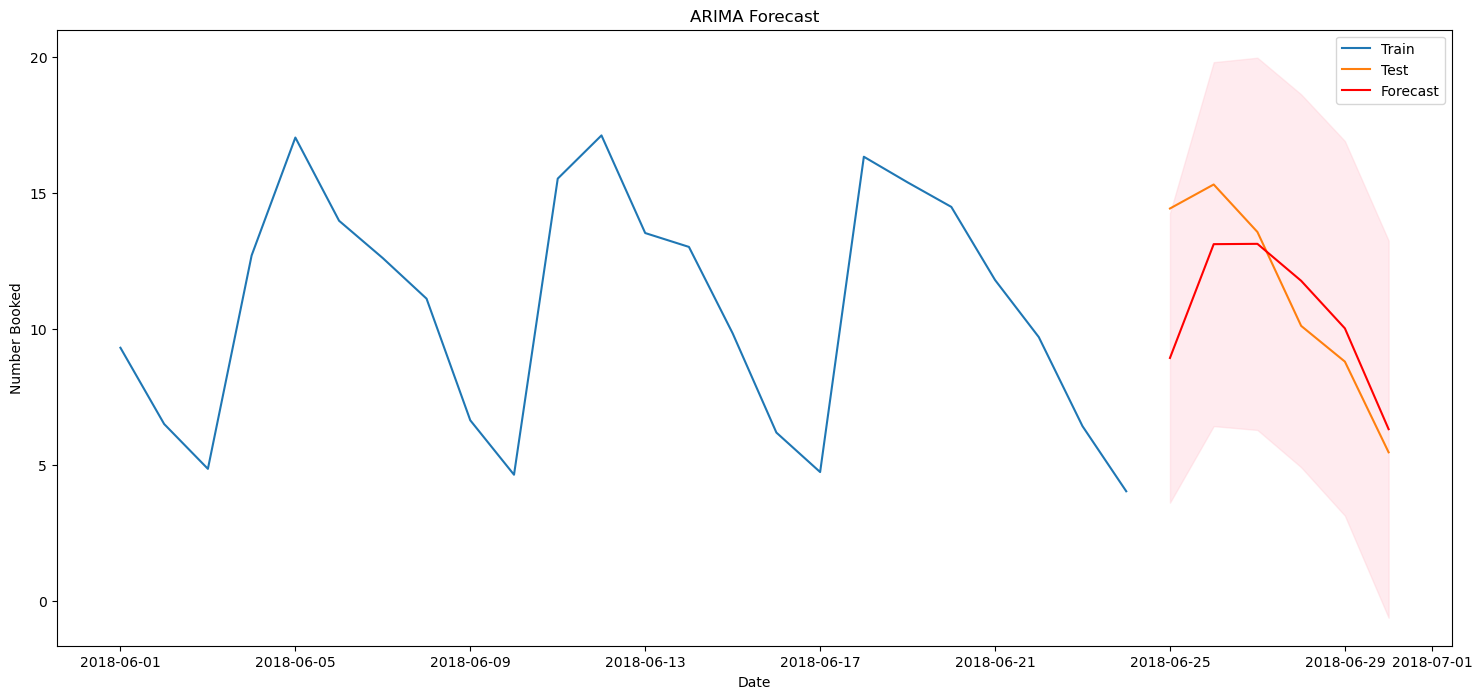

Mean Squared Error: 6.688369280190408


In [13]:
var_2.sort_index(inplace=True)

# Check for missing values
missing_values = var_2.isnull().sum()
print(missing_values)

# Handle missing values (e.g., fill with forward fill)
var_2.fillna(method='ffill', inplace=True)

# Aggregate the data by summing up the bookings per day
daily_data = var_2.resample('D').sum()

# Train-test split
train_data = daily_data[:int(0.8*len(daily_data))]
test_data = daily_data[int(0.8*len(daily_data)):]

# Define the ARIMA model
arima_model = ARIMA(train_data['Number Booked'], order=(5, 1, 0))

# Fit the model
arima_results = arima_model.fit()

# Forecast
forecast = arima_results.get_forecast(steps=len(test_data))
forecast_index = test_data.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
confidence_intervals = forecast.conf_int()

# Plot the results
plt.figure(figsize=(18, 8))
plt.plot(train_data['Number Booked'], label='Train')
plt.plot(test_data['Number Booked'], label='Test')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Number Booked')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(test_data['Number Booked'], forecast_series)
print(f'Mean Squared Error: {mse}')